Initial Analysis by Lewis Howell
============

Initial investigation into the dataset found at https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression/kernels

Investigating:

  * Number of rows and columns
  * Data types
  * Duplicate rows
  * Missing Values
  * Balance of binary data
  * Distribution of continous data
  * Summary statistics
  * Heat map of correlations
  * Inidividual correlation to CHD to find most important factors


In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as seab
%matplotlib inline

%config InlineBackend.figure_format ='retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [237]:
df = pd.read_csv('./framingham.csv') # Read in CSV data

In [238]:
df['age'] = df['age'].astype('float64')


print(df.shape, "rows x columns\n")
print("Data types:\n", df.dtypes)
df.head(10) # Print first few rows

(4240, 16) rows x columns

Data types:
 male                 int64
age                float64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39.0,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46.0,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48.0,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61.0,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46.0,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43.0,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63.0,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45.0,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52.0,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43.0,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [215]:
# check for dupicates - there are none
duplicate_df = df[df.duplicated()]
print("Number of duplicate rows: ", len(duplicate_df))

Number of duplicate rows:  0


In [262]:
# check for missing values
print(df.isna().sum().sort_values(ascending=False))
null = df[df.isna().any(axis=1)]
print("\nTotal number of rows with null values:" , null.shape[0])


glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
TenYearCHD           0
diaBP                0
sysBP                0
diabetes             0
prevalentHyp         0
prevalentStroke      0
currentSmoker        0
age                  0
male                 0
dtype: int64

Total number of rows with null values: 582


Index(['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'TenYearCHD'],
      dtype='object')


,male,currentSmoker,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,BPMeds,education
0.0,2420.0,2145.0,4215.0,2923.0,4131.0,3596.0,4063.0,NaN
1.0,1820.0,2095.0,25.0,1317.0,109.0,644.0,124.0,1720.0
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1253.0
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,689.0
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,473.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A9F67830F0>,
      dtype=object)

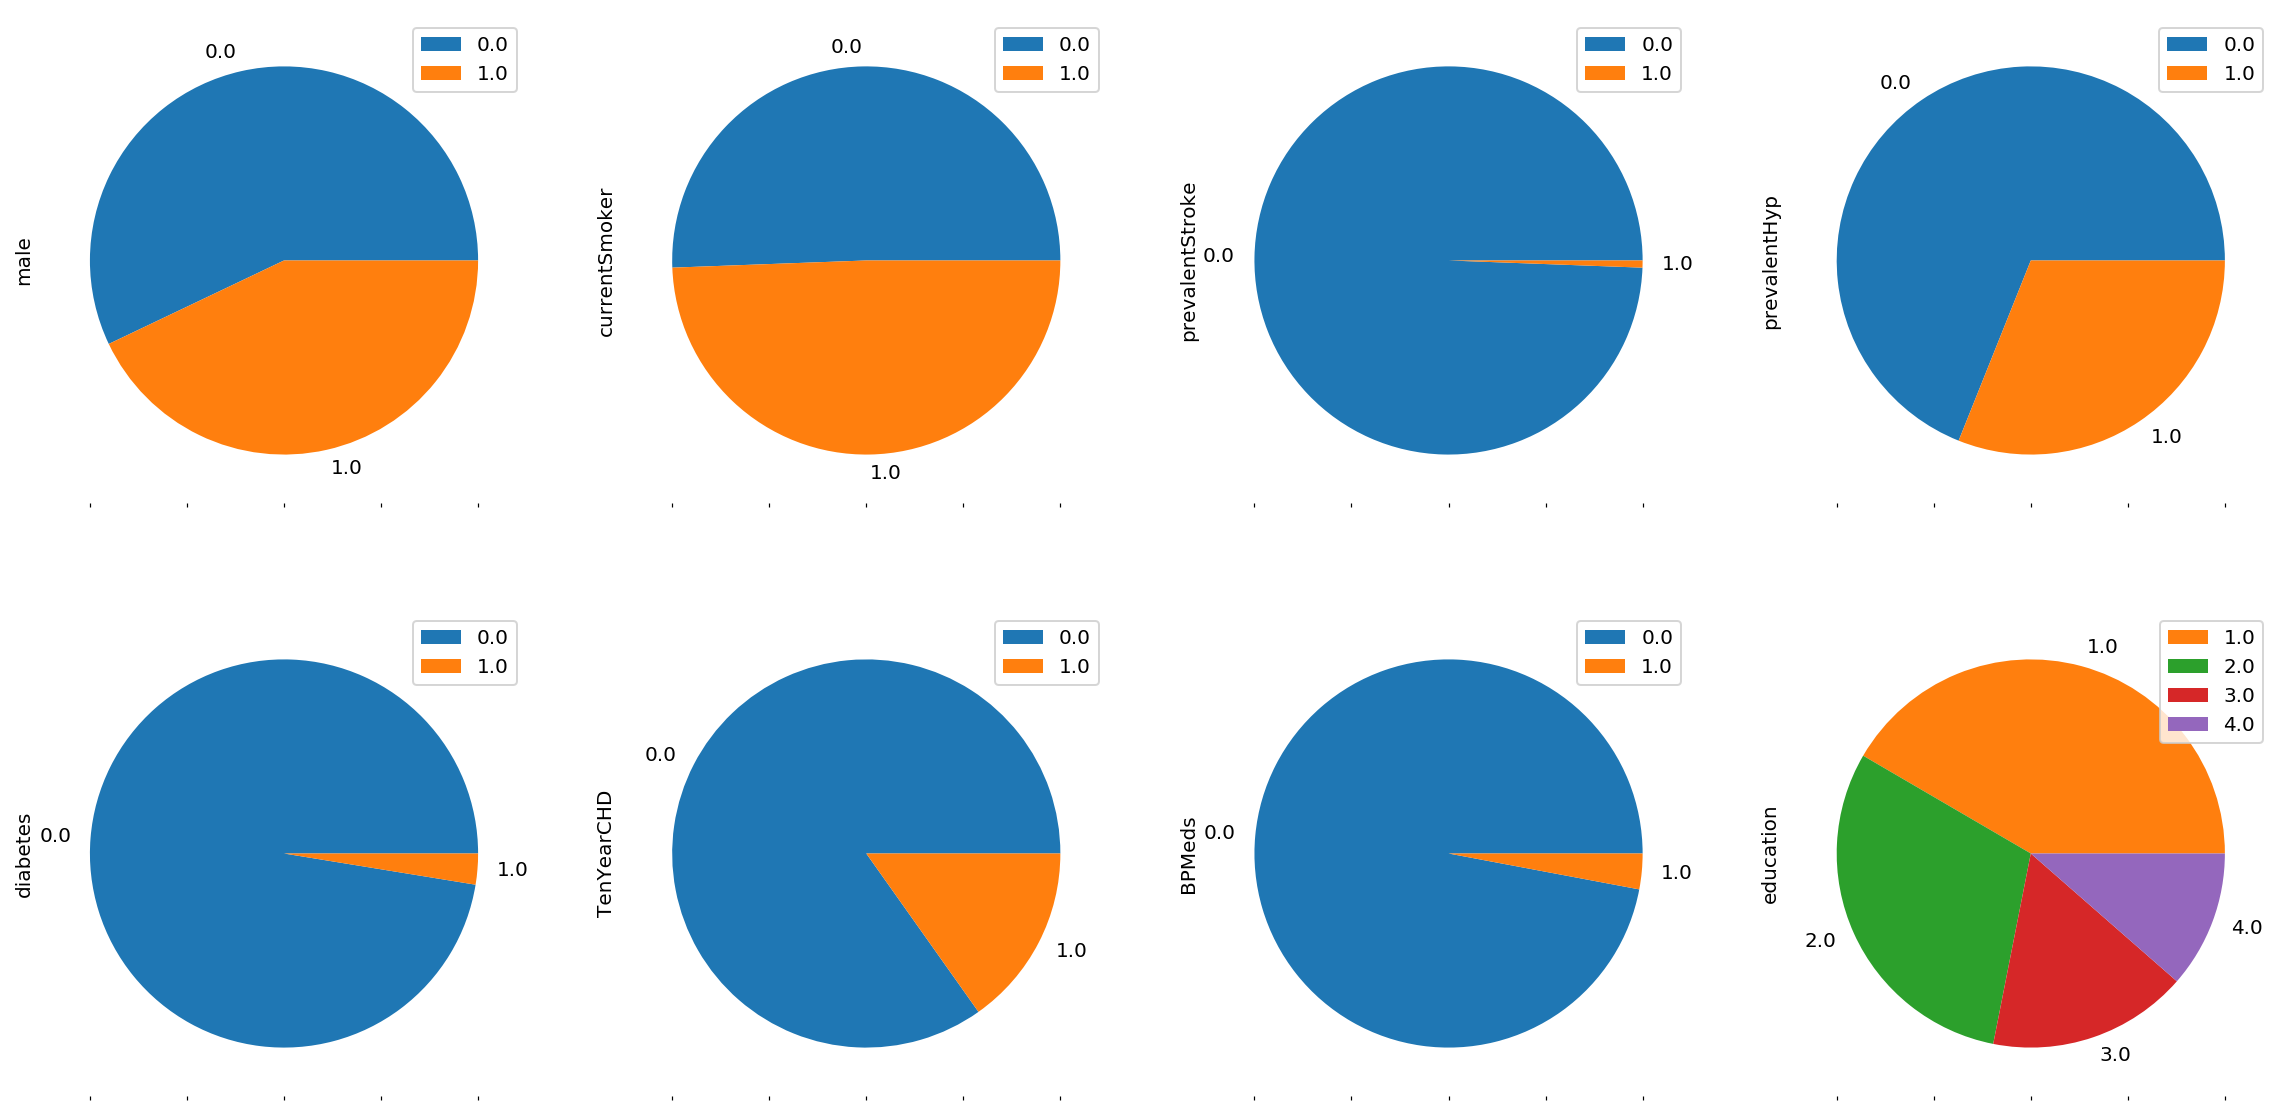

In [261]:
# check balance of binary data:

df_types = df.dtypes
print(df_types[df_types == 'int64'].index)
df_binary_only = df[['male', 'currentSmoker', 'prevalentStroke', 'prevalentHyp', 'diabetes',
       'TenYearCHD','BPMeds','education']]

df_binary_only=df_binary_only.apply(pd.Series.value_counts) # count 1s and 0s 
df_binary_only

df_binary_only.plot(kind='pie',subplots=True,layout=(2,4),figsize=(20,10))

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP',
       'BMI', 'heartRate', 'glucose'],
      dtype='object')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A9F5492DA0>,
      dtype=object)

age              AxesSubplot(0.125,0.125;0.0731132x0.755)
education     AxesSubplot(0.212736,0.125;0.0731132x0.755)
cigsPerDay    AxesSubplot(0.300472,0.125;0.0731132x0.755)
totChol       AxesSubplot(0.388208,0.125;0.0731132x0.755)
sysBP         AxesSubplot(0.475943,0.125;0.0731132x0.755)
diaBP         AxesSubplot(0.563679,0.125;0.0731132x0.755)
BMI           AxesSubplot(0.651415,0.125;0.0731132x0.755)
heartRate     AxesSubplot(0.739151,0.125;0.0731132x0.755)
glucose       AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

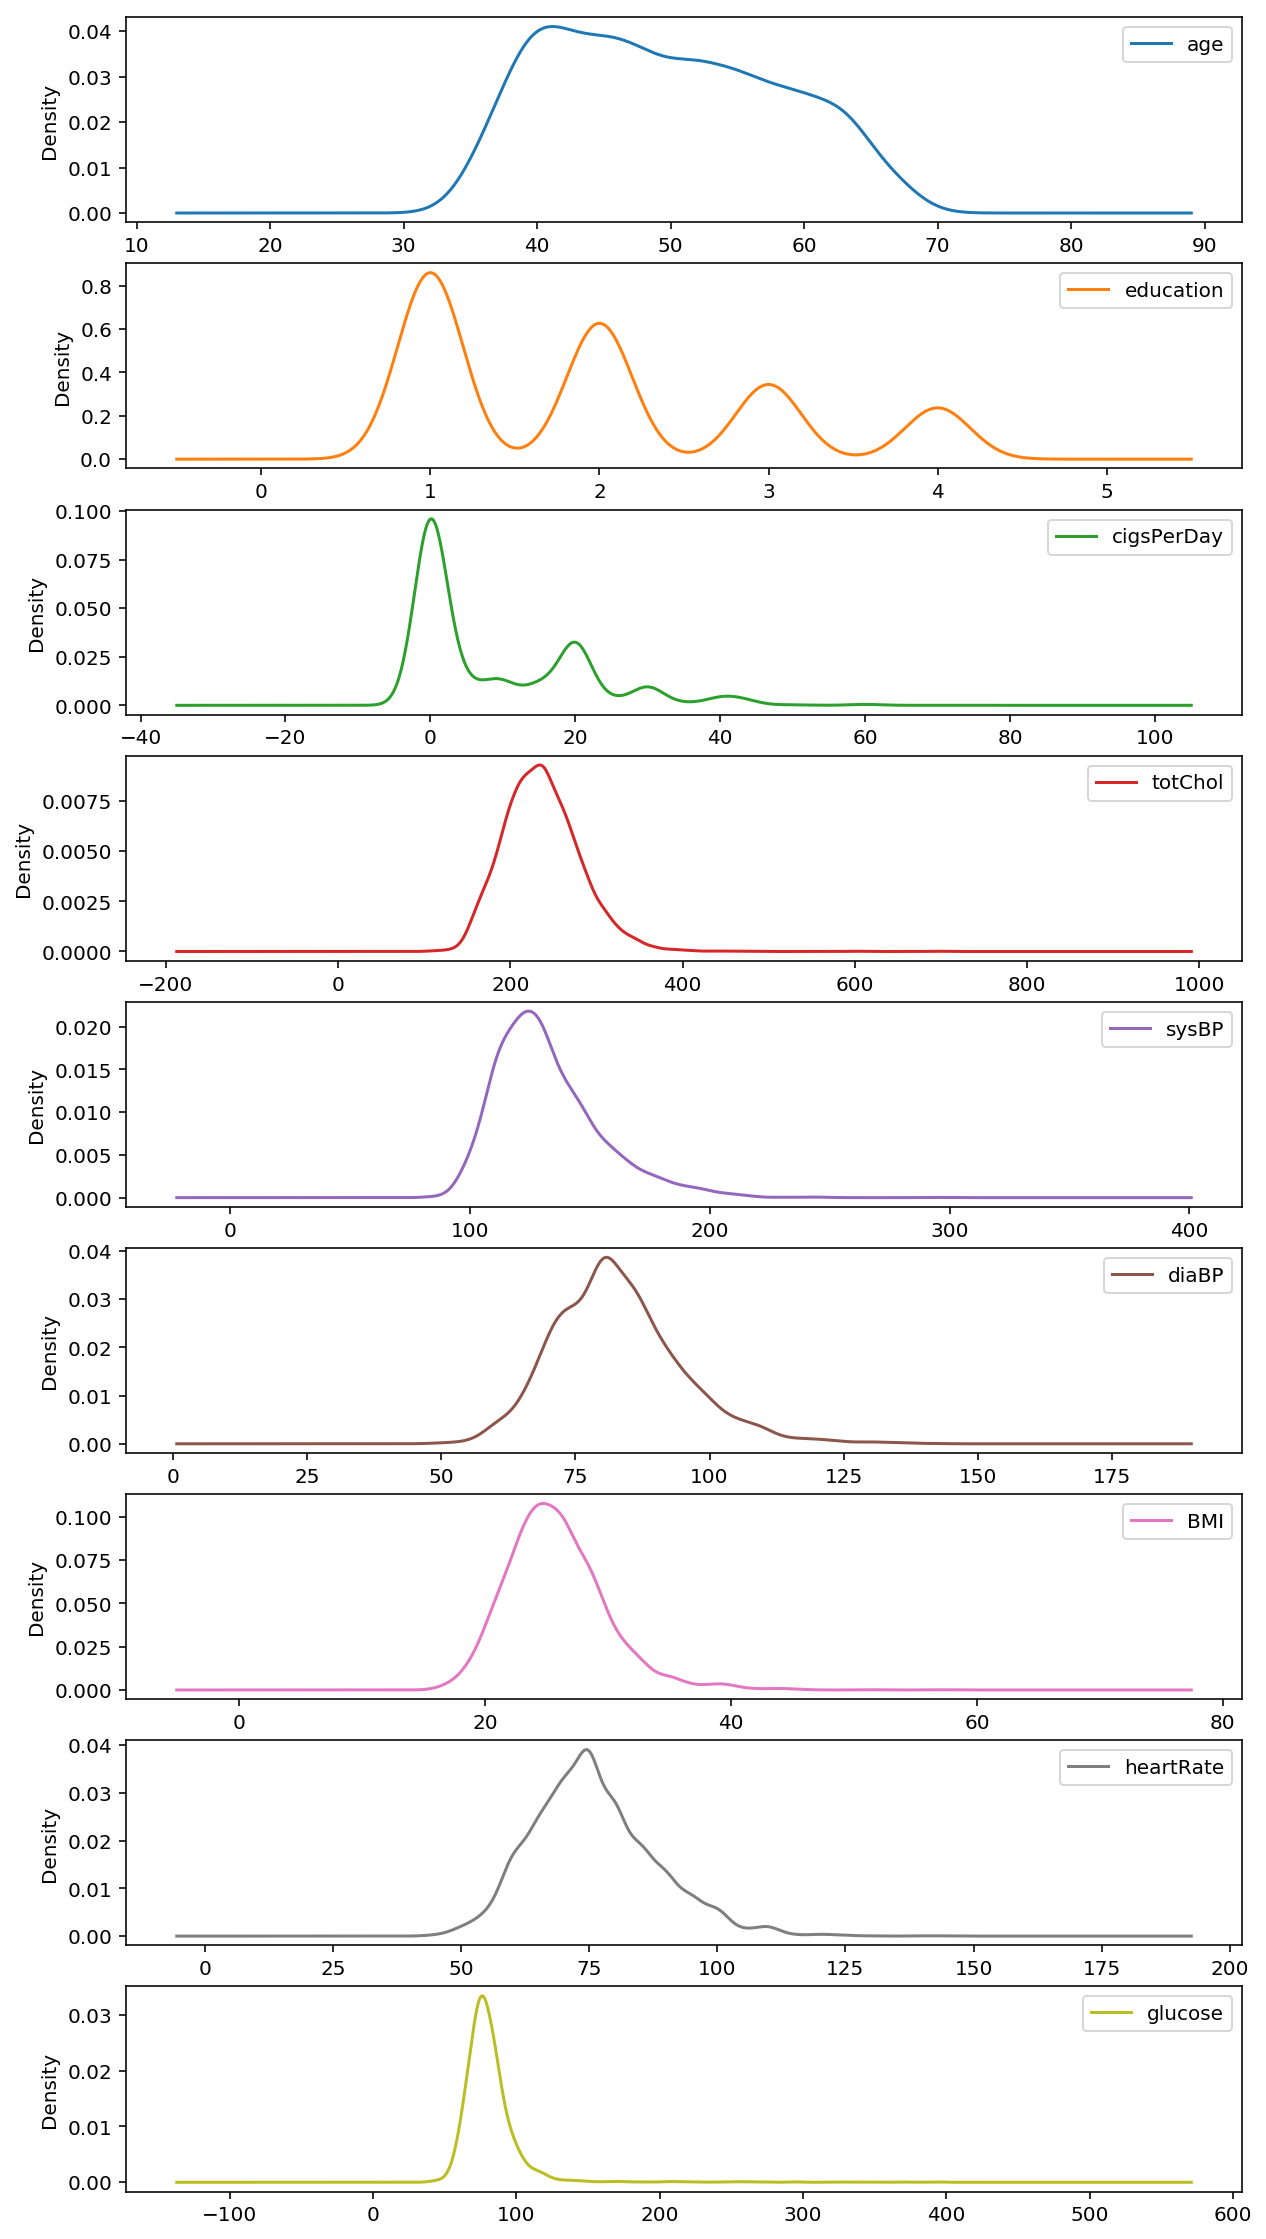

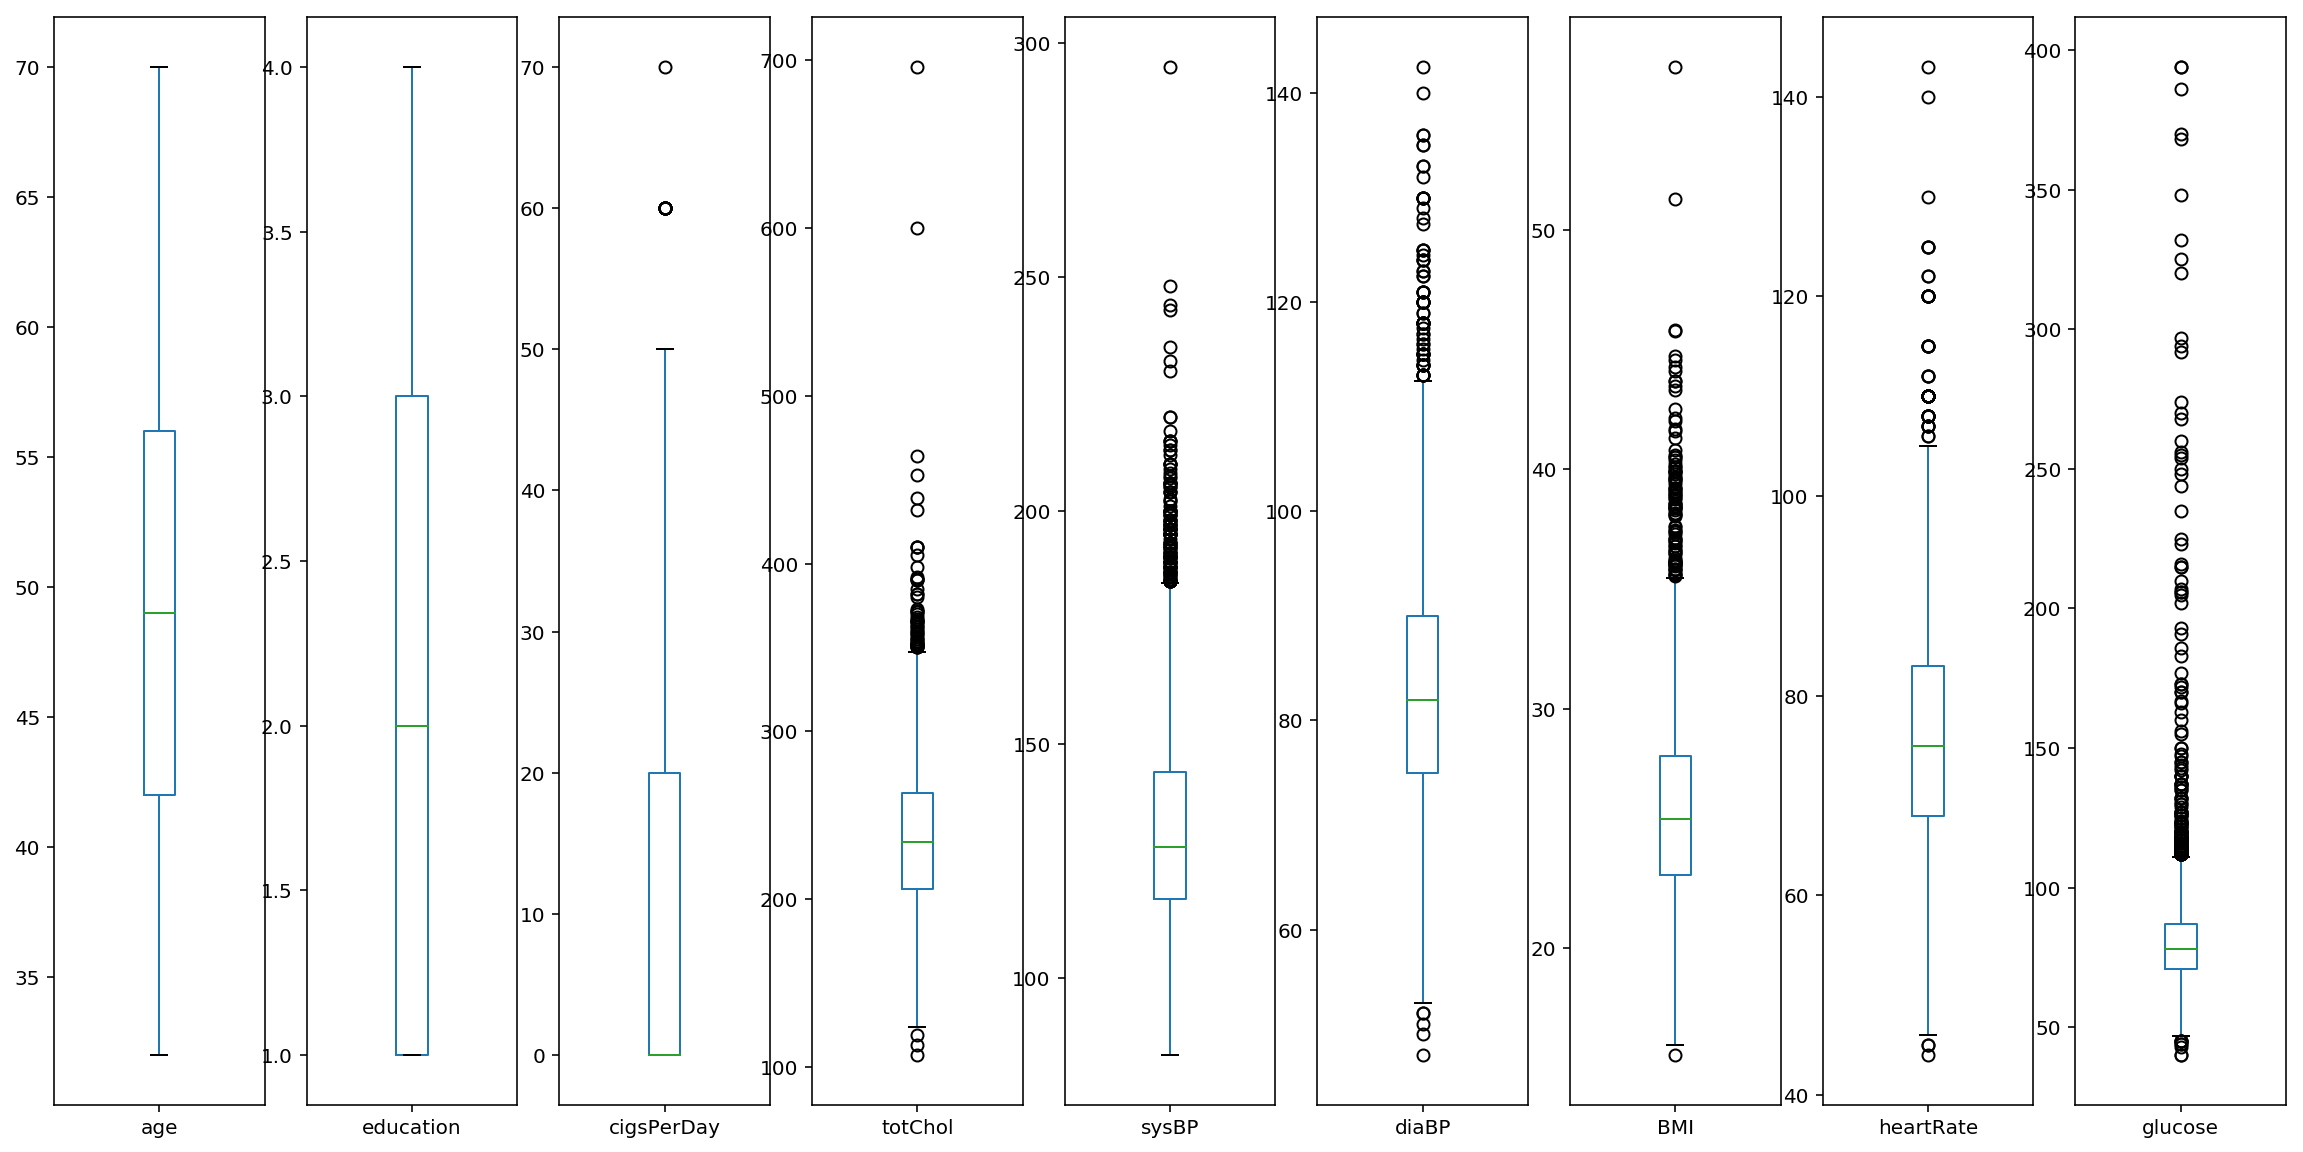

In [256]:
print(df_types[df_types == 'float64'].index)
df_continuous = df[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP',
       'BMI', 'heartRate', 'glucose']]

df_continuous.plot(kind='kde',subplots=True,figsize=(10,20),sharex=False)
df_continuous.plot(kind='box',subplots=True,figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A9CEC44BE0>,
      dtype=object)

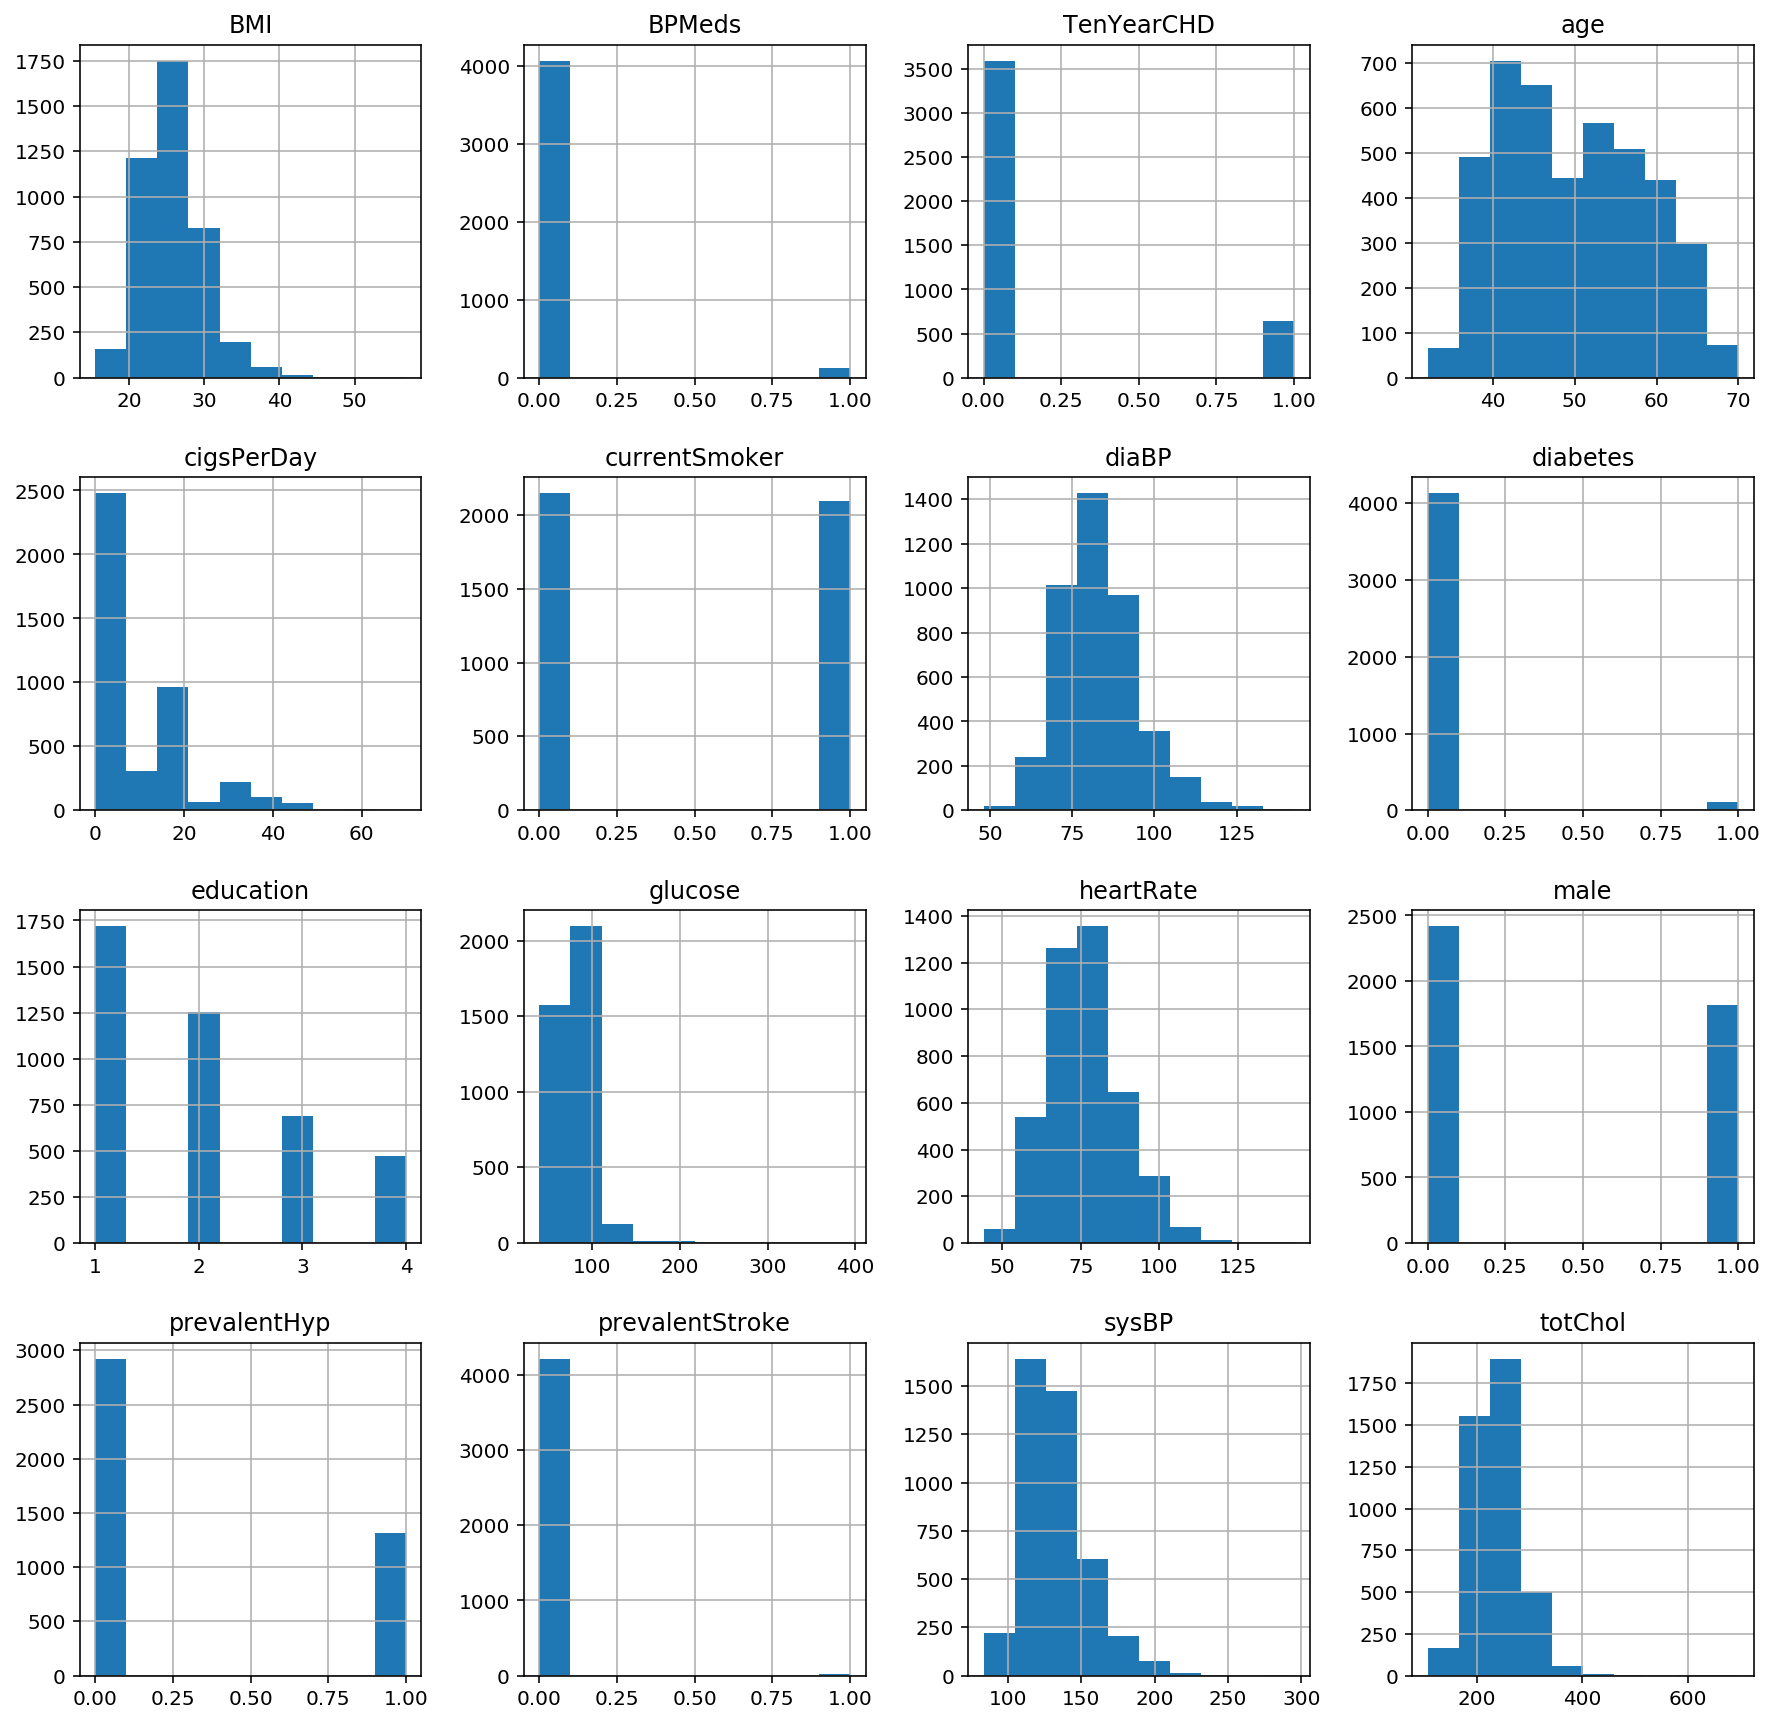

In [35]:
# check distributions

fig = plt.figure(figsize = (15,15))
ax = fig.gca()
#plt.axis('off')

df.hist(ax = ax)

In [39]:
df_summary = df.describe(include='all') # generate summary stats
df_summary

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


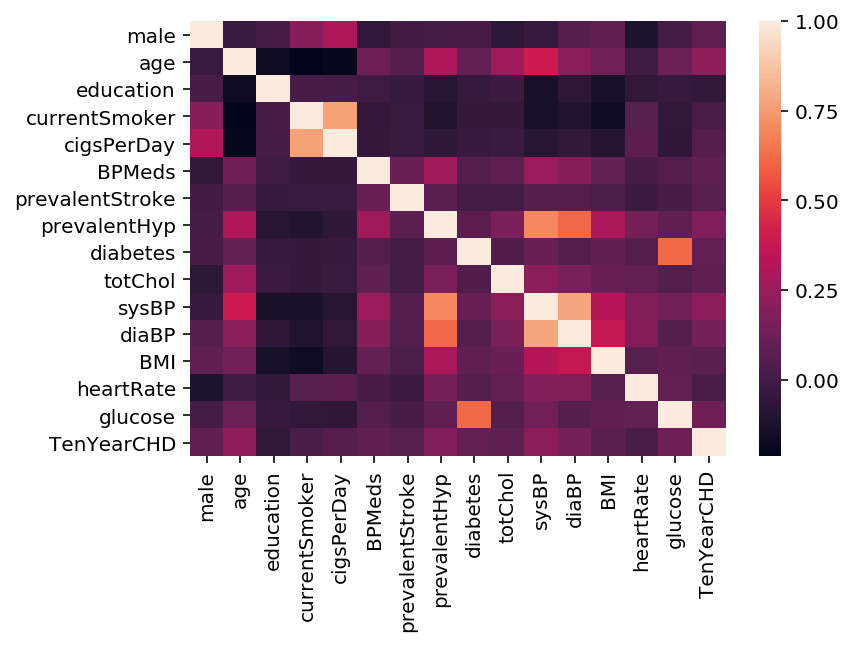

In [89]:
# checking which features are correlated with each other and with the outcome variable
df_corr = df.corr()
seab.heatmap(df_corr)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text xticklabel objects>)

Text(0, 0.5, 'Correlation')

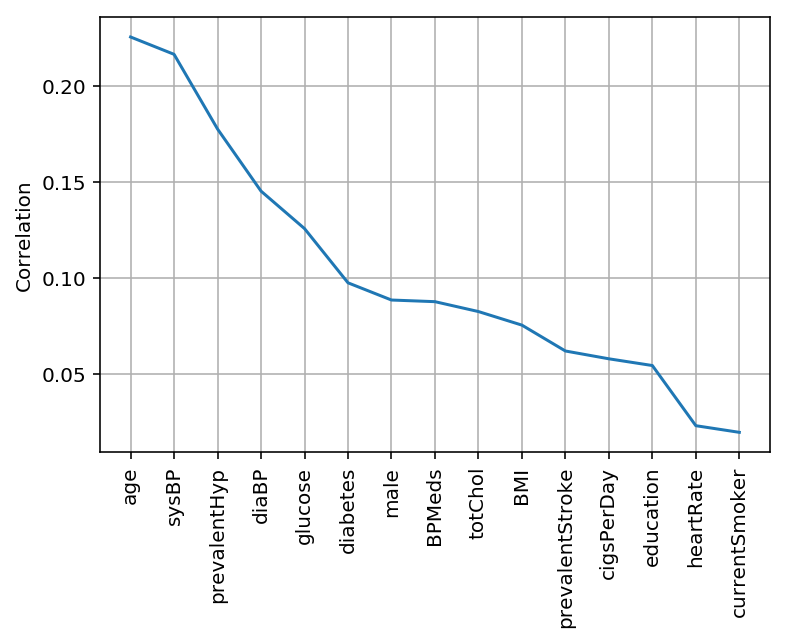

In [92]:
df_corr_sorted = df_corr['TenYearCHD'].abs().sort_values(ascending=False) #sort correlations
df_corr_sorted = df_corr_sorted.drop('TenYearCHD') # drop correlation with itself
plt.plot(df_corr_sorted) # Sort by correlation with age)
plt.xticks(rotation=90)
plt.ylabel('Correlation')
plt.grid()
plt.show()



In [91]:
#Correlation with TenYearCHD
df_corr_sorted

age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.125590
diabetes           0.097344
male               0.088374
BPMeds             0.087519
totChol            0.082369
BMI                0.075300
prevalentStroke    0.061823
cigsPerDay         0.057755
education          0.054248
heartRate          0.022907
currentSmoker      0.019448
Name: TenYearCHD, dtype: float64